# 1. Đọc dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/Pima Indians Diabetes Database.csv")

# 2. Kiểm tra các thông tin cơ bản

In [ ]:
# Hiển thị thông tin chung về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Chuyển đổi định dạng các cột thành float
columns_to_convert = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
#Kiểm tra chất lượng dữ liệu
print(f"Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

print(f"\nSố lượng dòng trùng lặp: {df.duplicated().sum()}")

Số lượng giá trị thiếu trong mỗi cột:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Số lượng dòng trùng lặp: 0


In [ ]:
# Xử lý giá trị 0 ở các thuộc tính không hợp lệ
columns_to_fix = ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']
print(f'Số lượng giá trị 0 ở các thuộc tính không hợp lệ:')
print(df[columns_to_fix].isin([0]).sum())


Số lượng giá trị 0 ở các thuộc tính không hợp lệ:
Glucose            5
BloodPressure     35
BMI               11
SkinThickness    227
Insulin          374
dtype: int64


In [ ]:
# Loại bỏ cột 'SkinThickness' và 'Insulin' do quá nhiều giá trị không hợp lệ
df = df.drop(columns=['SkinThickness'])
df = df.drop(columns=['Insulin'])

In [ ]:
#Xử lý các giá trị không hợp lệ của các cột 'Glucose', 'BloodPressure', 'BMI' bằng giá trị trung bình
columns_fix = ['Glucose', 'BloodPressure', 'BMI']
for column in columns_fix:
    df[column] = df[column].replace(0, df[column].mean())
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [ ]:
#Thống kê mô tả
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


# 3. EDA

In [ ]:
# Import các thư viện cần
import matplotlib.pyplot as plt
import seaborn as sns

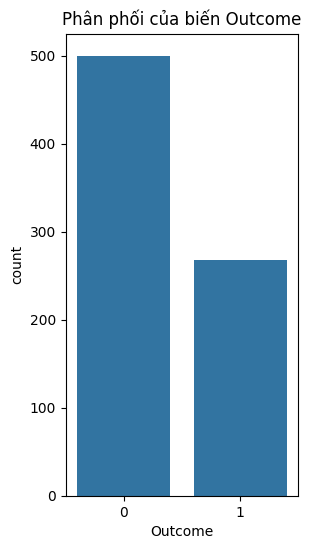

In [ ]:
# Phân phối của biến target
plt.figure(figsize=(3, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Phân phối của biến Outcome')
plt.show()

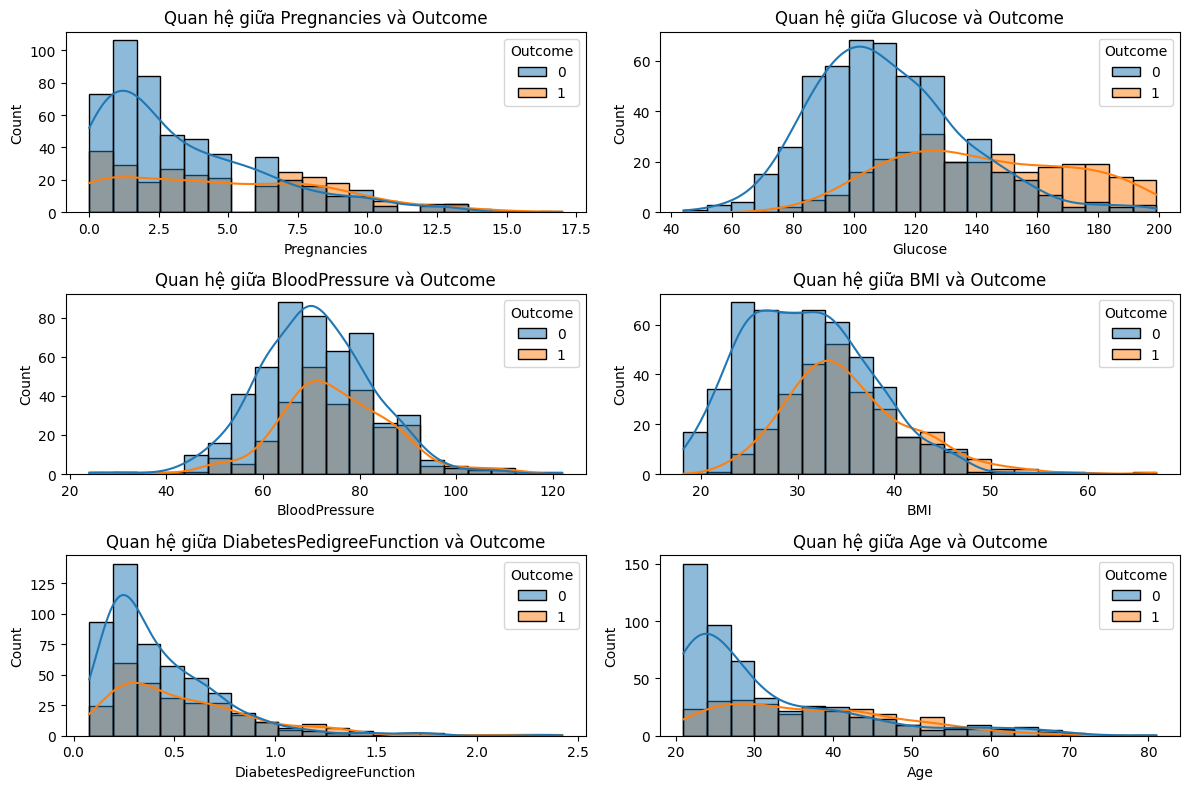

In [ ]:
# Mối quan hệ giữa các features và Target
plt.figure(figsize=(12, 8))
num_cols = len(df.columns[:-1])  # Get the number of features
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

for i, column in enumerate(df.columns[:-1]):
  plt.subplot(num_rows, 2, i + 1)  # Adjust the subplot grid
  sns.histplot(data=df, x=column, hue='Outcome', kde=True, bins=20)
  plt.title(f'Quan hệ giữa {column} và Outcome')
  plt.tight_layout()

# 4. Modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

#2. Feature engineering: Scaling data
X = df.drop(columns=['Outcome'])  # Đặc trưng (features)
y = df['Outcome']  # Biến mục tiêu (target)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Xử lý mất cân bằng dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 3. Chia dữ liệu (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 4. Chọn mô hình: Sử dụng Random Forest với Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)

# 5. Huấn luyện mô hình (train)
model.fit(X_train, y_train)

# 6. Dự đoán trên tập test
y_pred = model.best_estimator_.predict(X_test)

# 7. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Evaluation Metrics:
Accuracy: 0.81
Precision: 0.77
Recall: 0.88
F1-score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        99
           1       0.77      0.88      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

